In [1]:
import sys
sys.path.insert(1, '../FeatureEngineering')

import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Model

Cargo datasets, grafico nomas para ver cuantos hay de Verdaderos y Falsos

Text(0.5, 1.0, 'Falsos / Verdaderos')

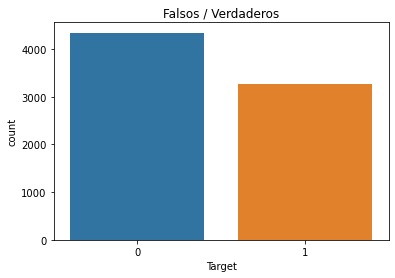

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sns.countplot(train_df['target'])
plt.xlabel('Target')
plt.title('Falsos / Verdaderos')

In [4]:
X = train_df['text']
Y = train_df['target']

Hago split para testear accuracy

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size=0.33,random_state = 17)

In [6]:
max_words = 1000
max_len = 150
tok = Tokenizer(max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [7]:
def RNN():
    model = Sequential([
    tf.keras.layers.Embedding(max_words, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)])
    return model
    

In [8]:
model = RNN()
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 138,369
Trainable params: 138,369
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(sequences_matrix, Y_train, epochs=20, shuffle=True, validation_split=0.2)

Epoch 1/20
128/128 [==============================] - 28s 217ms/step - loss: 0.6787 - accuracy: 0.5809 - val_loss: 0.6960 - val_accuracy: 0.5265
Epoch 2/20
128/128 [==============================] - 26s 205ms/step - loss: 0.6467 - accuracy: 0.5809 - val_loss: 0.6527 - val_accuracy: 0.5265
Epoch 3/20
128/128 [==============================] - 25s 196ms/step - loss: 0.5816 - accuracy: 0.6556 - val_loss: 0.5993 - val_accuracy: 0.6461
Epoch 4/20
128/128 [==============================] - 25s 192ms/step - loss: 0.4968 - accuracy: 0.7510 - val_loss: 0.5515 - val_accuracy: 0.7069
Epoch 5/20
128/128 [==============================] - 27s 209ms/step - loss: 0.4317 - accuracy: 0.7951 - val_loss: 0.5295 - val_accuracy: 0.7324
Epoch 6/20
128/128 [==============================] - 26s 204ms/step - loss: 0.4027 - accuracy: 0.8115 - val_loss: 0.5082 - val_accuracy: 0.7559
Epoch 7/20
128/128 [==============================] - 29s 224ms/step - loss: 0.3766 - accuracy: 0.8262 - val_loss: 0.5230 - val_ac

In [10]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [11]:
accr = model.evaluate(test_sequences_matrix,Y_test)

79/79 [==============================] - 3s 37ms/step - loss: 0.5741 - accuracy: 0.7744


In [12]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.574
  Accuracy: 0.774
